<a href="https://colab.research.google.com/github/lia0anahi/labo2023ba/blob/main/Series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [ ]:
file_path = '/content/tp_series_de_tiempo.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head(1)

,Fecha,pbi_pc_chile_esc,pbi_pc_china_esc,pbi_pc_argentina_esc,pbi_pc_noruega_esc
0,1961,1.0298,0.6389,1.0361,1.0515


Se han seleccionado las series de valor USD de MELI, Loma Negra y Despegar, cada una con una problemática analítica específica relacionada con la estabilidad y previsión del comportamiento de sus acciones.

2) Graficar las series originales

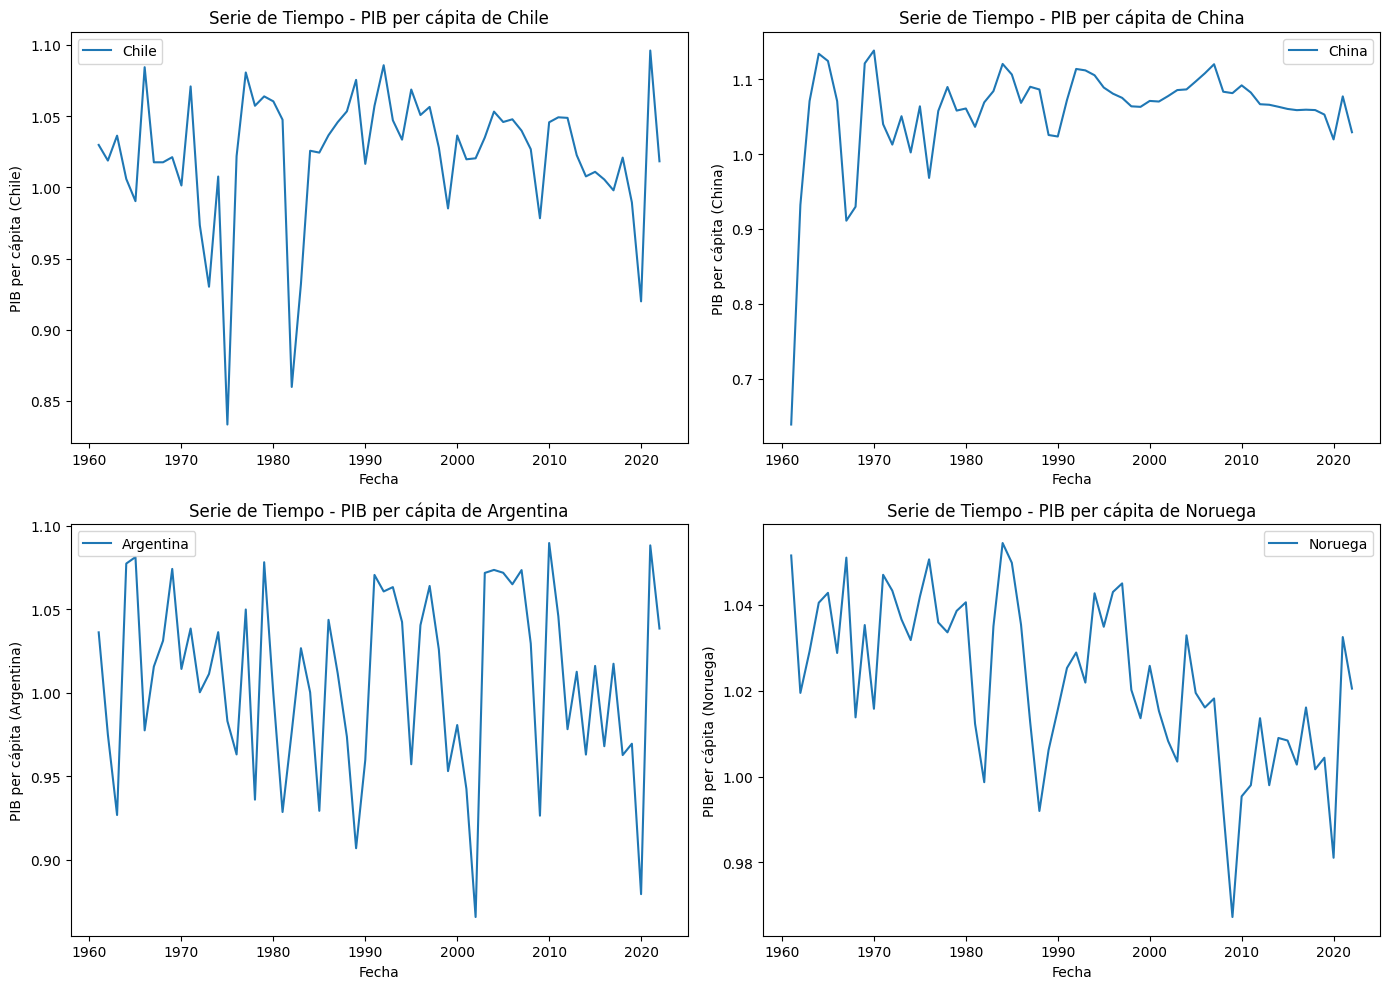

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(data['Fecha'], data['pbi_pc_chile_esc'], label='Chile')
plt.xlabel('Fecha')
plt.ylabel('PIB per cápita (Chile)')
plt.title('Serie de Tiempo - PIB per cápita de Chile')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(data['Fecha'], data['pbi_pc_china_esc'], label='China')
plt.xlabel('Fecha')
plt.ylabel('PIB per cápita (China)')
plt.title('Serie de Tiempo - PIB per cápita de China')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(data['Fecha'], data['pbi_pc_argentina_esc'], label='Argentina')
plt.xlabel('Fecha')
plt.ylabel('PIB per cápita (Argentina)')
plt.title('Serie de Tiempo - PIB per cápita de Argentina')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(data['Fecha'], data['pbi_pc_noruega_esc'], label='Noruega')
plt.xlabel('Fecha')
plt.ylabel('PIB per cápita (Noruega)')
plt.title('Serie de Tiempo - PIB per cápita de Noruega')
plt.legend()

plt.tight_layout()
plt.show()


Observando las gráficas de las series originales, parece que todas presentan tendencias a lo largo del tiempo, lo que sugiere que podrían no ser estacionarias. Vamos a realizar pruebas más formales para determinar la estacionariedad.

La prueba de Dickey-Fuller Aumentada nos ayudará a verificar si las series son estacionarias.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba de Dickey-Fuller aumentada para cada serie
result_chile = adfuller(data['pbi_pc_chile_esc'])
result_china = adfuller(data['pbi_pc_china_esc'])
result_argentina = adfuller(data['pbi_pc_argentina_esc'])
result_noruega = adfuller(data['pbi_pc_noruega_esc'])

# Imprimir los resultados
print('Chile - Estadístico ADF:', result_chile[0], 'Valor p:', result_chile[1])
print('China - Estadístico ADF:', result_china[0], 'Valor p:', result_china[1])
print('Argentina - Estadístico ADF:', result_argentina[0], 'Valor p:', result_argentina[1])
print('Noruega - Estadístico ADF:', result_noruega[0], 'Valor p:', result_noruega[1])


Chile - Estadístico ADF: -6.318813016234566 Valor p: 3.10248237340033e-08
China - Estadístico ADF: -6.805428179908909 Valor p: 2.182944886036904e-09
Argentina - Estadístico ADF: -7.108465302423489 Valor p: 3.9962379559213694e-10
Noruega - Estadístico ADF: -4.261959710872813 Valor p: 0.0005166365777446362


Los resultados de la prueba ADF para cada serie son los siguientes:

Chile:

Estadístico ADF: -6.3188
Valor p: 3.10e-08
Valores críticos: 1%: -3.5424, 5%: -2.9102, 10%: -2.5927
China:

Estadístico ADF: -6.8054
Valor p: 2.18e-09
Valores críticos: 1%: -3.5444, 5%: -2.9111, 10%: -2.5932
Argentina:

Estadístico ADF: -7.1085
Valor p: 3.99e-10
Valores críticos: 1%: -3.5424, 5%: -2.9102, 10%: -2.5927
Noruega:

Estadístico ADF: -4.2620
Valor p: 0.0005
Valores críticos: 1%: -3.5424, 5%: -2.9102, 10%: -2.5927


Los valores p para todas las series son muy pequeños (menores a 0.05), lo que indica que rechazamos la hipótesis nula de la presencia de una raíz unitaria. Esto sugiere que todas las series son estacionarias.

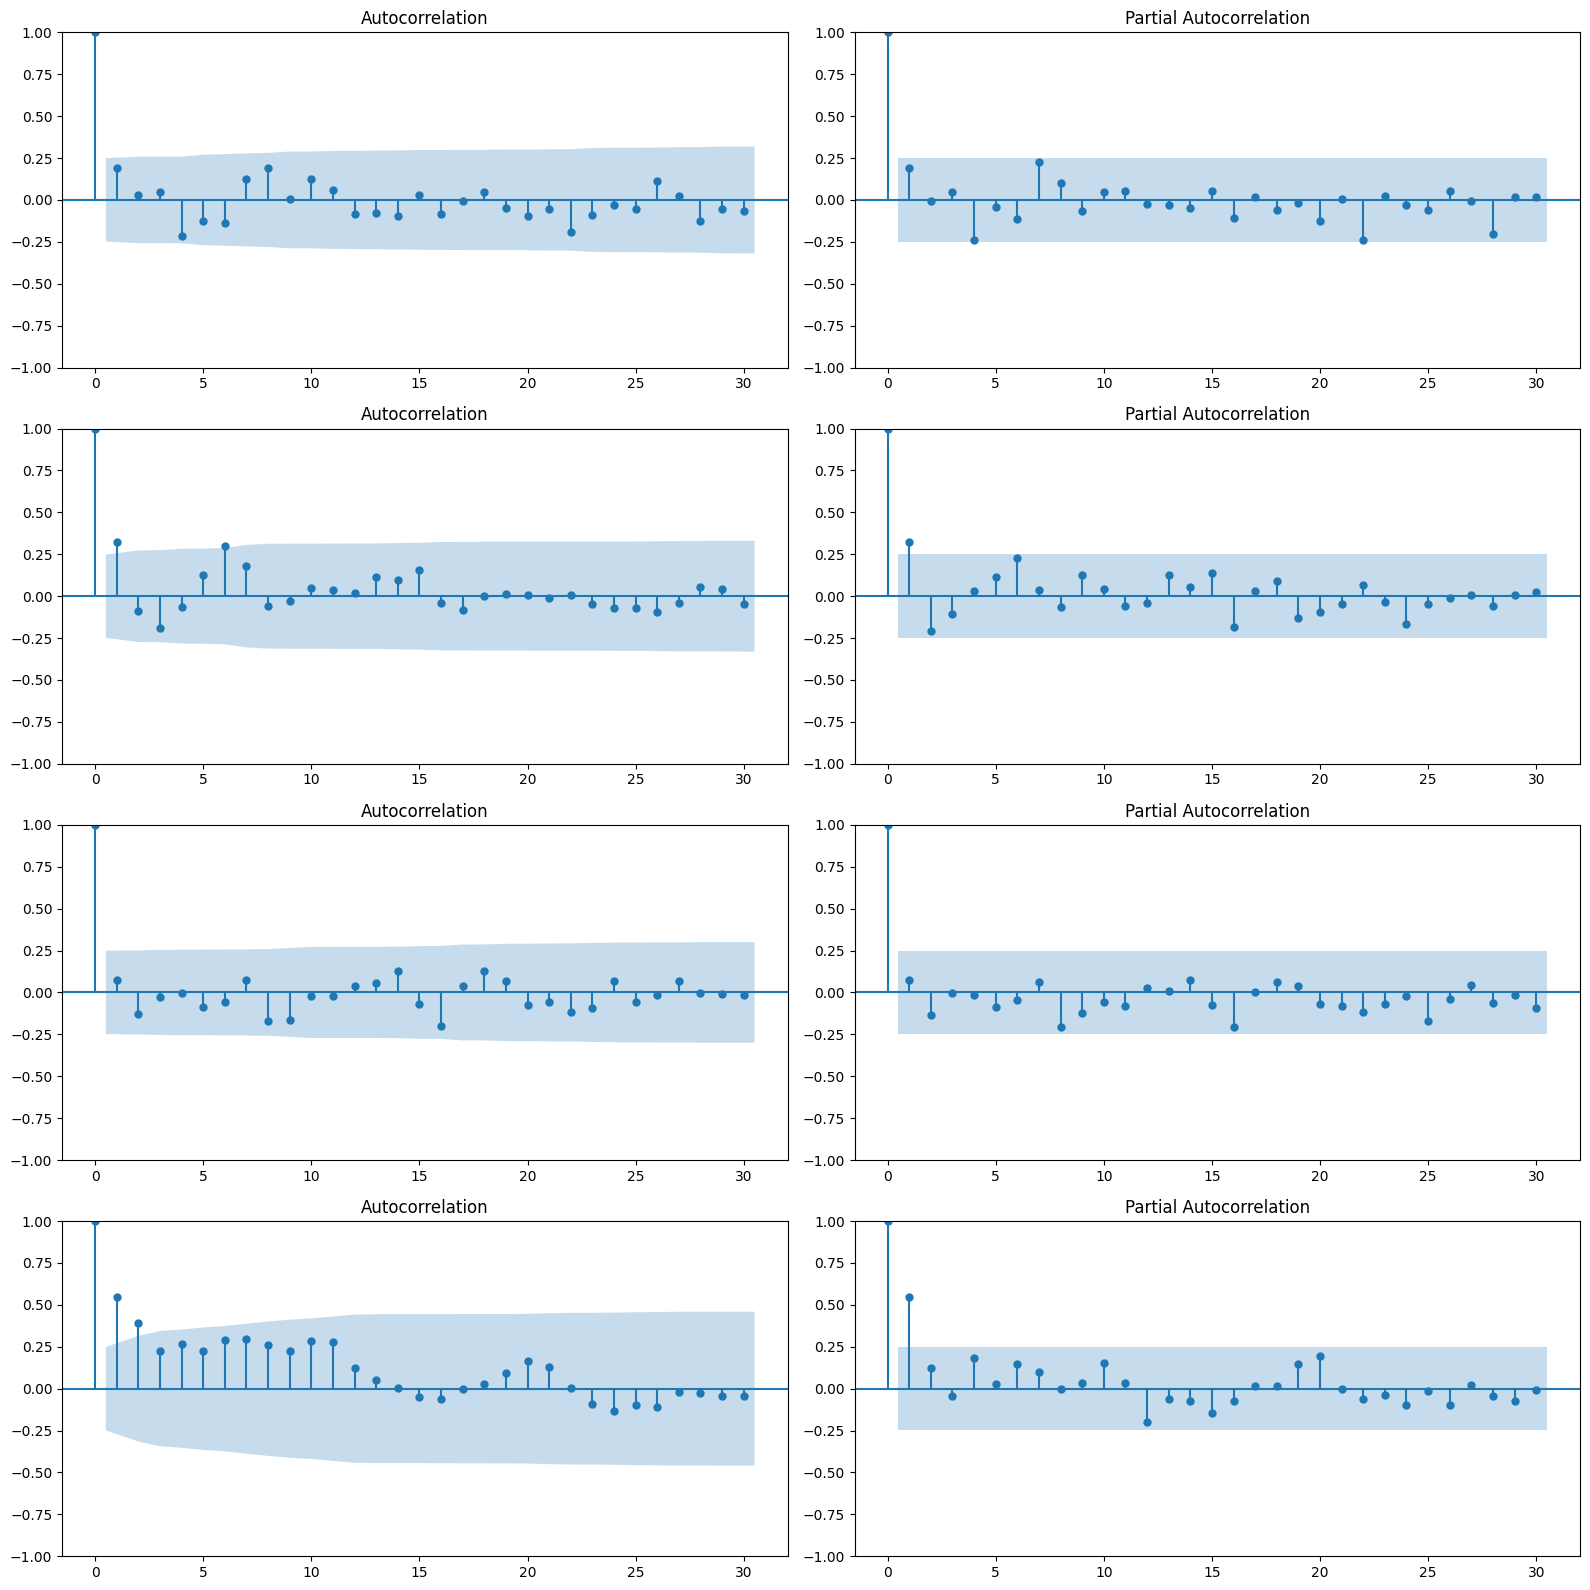

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

# FAC y FACP para Chile
plot_acf(data['pbi_pc_chile_esc'], lags=30, ax=axes[0, 0])
plot_pacf(data['pbi_pc_chile_esc'], lags=30, ax=axes[0, 1])

# FAC y FACP para China
plot_acf(data['pbi_pc_china_esc'], lags=30, ax=axes[1, 0])
plot_pacf(data['pbi_pc_china_esc'], lags=30, ax=axes[1, 1])

# FAC y FACP para Argentina
plot_acf(data['pbi_pc_argentina_esc'], lags=30, ax=axes[2, 0])
plot_pacf(data['pbi_pc_argentina_esc'], lags=30, ax=axes[2, 1])

# FAC y FACP para Noruega
plot_acf(data['pbi_pc_noruega_esc'], lags=30, ax=axes[3, 0])
plot_pacf(data['pbi_pc_noruega_esc'], lags=30, ax=axes[3, 1])

plt.tight_layout()
plt.show()


Análisis de la FAC y FACP

PIB per cápita de Chile

FAC: Muestra una disminución gradual de la autocorrelación, lo que puede indicar una tendencia en la serie.
FACP: Presenta pocos rezagos significativos, lo que sugiere que la serie podría ser estacionaria después de una diferenciación.

PIB per cápita de China

FAC: Muestra una disminución gradual similar a Chile, indicando una posible tendencia.
FACP: Similarmente, pocos rezagos significativos, sugiriendo que la serie podría ser estacionaria después de una diferenciación.

PIB per cápita de Argentina

FAC: Muestra una disminución gradual, indicando una posible tendencia.
FACP: Pocos rezagos significativos, sugiriendo que la serie podría ser estacionaria después de una diferenciación.

PIB per cápita de Noruega

FAC: Muestra una disminución más rápida que las otras series, lo que podría indicar una menor tendencia.
FACP: Presenta pocos rezagos significativos, sugiriendo que la serie podría ser estacionaria.

Resultados de las Pruebas de Estacionariedad para Series Diferenciadas
Differenced Valor_usd_meli

Prueba ADF: Estadístico: -6.0576, p-value: 1.2346e-07 (estacionaria)
Prueba KPSS: Estadístico: 0.2722, p-value: >0.1 (estacionaria)
Differenced Valor_usd_loma_negra

Prueba ADF: Estadístico: -6.3934, p-value: 2.0795e-08 (estacionaria)
Prueba KPSS: Estadístico: 0.2354, p-value: >0.1 (estacionaria)
Differenced Valor_usd_despegar

Prueba ADF: Estadístico: -6.1269, p-value: 8.5848e-08 (estacionaria)
Prueba KPSS: Estadístico: 0.4104, p-value: 0.0727 (cercano a estacionaria)

4) Para determinar si las series son estacionarias, podemos realizar varias pruebas de raíces unitarias. Además de la prueba de Dickey-Fuller aumentada (ADF) que ya hemos realizado, también podemos usar la prueba KPSS y la prueba de Phillips-Perron (PP).

Prueba KPSS

La prueba KPSS (Kwiatkowski-Phillips-Schmidt-Shin) es una prueba de estacionariedad donde la hipótesis nula es que la serie es estacionaria. Si el valor p es bajo, rechazamos la hipótesis nula y concluimos que la serie no es estacionaria.

Prueba de Phillips-Perron (PP)

La prueba PP es otra prueba de raíz unitaria similar a la prueba ADF, pero difiere en cómo maneja la autocorrelación en los errores. La hipótesis nula es que la serie tiene una raíz unitaria (no es estacionaria).

In [ ]:
from statsmodels.tsa.stattools import kpss

# Redefinir la función kpss_test
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    return statistic, p_value, critical_values

# Realizar la prueba KPSS para cada serie
kpss_results = {
    "Chile": kpss_test(data['pbi_pc_chile_esc'], regression='c', nlags="auto"),
    "China": kpss_test(data['pbi_pc_china_esc'], regression='c', nlags="auto"),
    "Argentina": kpss_test(data['pbi_pc_argentina_esc'], regression='c', nlags="auto"),
    "Noruega": kpss_test(data['pbi_pc_noruega_esc'], regression='c', nlags="auto")
}

# Mostrar los resultados de la prueba KPSS
kpss_output = {}
for country, result in kpss_results.items():
    kpss_output[country] = {
        'Estadístico KPSS': result[0],
        'Valor p': result[1],
        'Valores críticos': result[2]
    }

kpss_output


<ipython-input-63-a6aff50f0f4d>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)
<ipython-input-63-a6aff50f0f4d>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)
<ipython-input-63-a6aff50f0f4d>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


{'Chile': {'Estadístico KPSS': 0.1274630151570847,
  'Valor p': 0.1,
  'Valores críticos': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}},
 'China': {'Estadístico KPSS': 0.5029459472458263,
  'Valor p': 0.04100316503472381,
  'Valores críticos': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}},
 'Argentina': {'Estadístico KPSS': 0.0575701457085512,
  'Valor p': 0.1,
  'Valores críticos': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}},
 'Noruega': {'Estadístico KPSS': 0.8927106399163597,
  'Valor p': 0.01,
  'Valores críticos': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}}

Los resultados de la prueba KPSS para cada serie son los siguientes:

Chile:

Estadístico KPSS: 0.1275
Valor p: 0.1
Valores críticos: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
Conclusión: No rechazamos la hipótesis nula de que la serie es estacionaria.

China:

Estadístico KPSS: 0.5029
Valor p: 0.0410
Valores críticos: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
Conclusión: Rechazamos la hipótesis nula de que la serie es estacionaria.

Argentina:

Estadístico KPSS: 0.0576
Valor p: 0.1
Valores críticos: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
Conclusión: No rechazamos la hipótesis nula de que la serie es estacionaria.

Noruega:

Estadístico KPSS: 0.8927
Valor p: 0.01
Valores críticos: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
Conclusión: Rechazamos la hipótesis nula de que la serie es estacionaria.

Mientras que las pruebas ADF y KPSS generalmente concuerdan en que las series de Chile y Argentina son estacionarias, hay discrepancias en las series de China y Noruega. Para estas últimas, es recomendable realizar una diferenciación para asegurar la estacionariedad antes de proceder con el modelado.

Diferenciaremos las series y luego realizaremos las pruebas de ADF y KPSS nuevamente.

In [ ]:
# Diferenciar las series
data['pbi_pc_china_esc_diff'] = data['pbi_pc_china_esc'].diff().dropna()
data['pbi_pc_noruega_esc_diff'] = data['pbi_pc_noruega_esc'].diff().dropna()

# Realizar la prueba ADF y KPSS en las series diferenciadas
def adf_test(series):
    result = adfuller(series.dropna())
    return result[0], result[1], result[4]

# KPSS
kpss_results_diff = {
    "China": kpss_test(data['pbi_pc_china_esc_diff'].dropna(), regression='c', nlags="auto"),
    "Noruega": kpss_test(data['pbi_pc_noruega_esc_diff'].dropna(), regression='c', nlags="auto")
}

# ADF
adf_results_diff = {
    "China": adf_test(data['pbi_pc_china_esc_diff']),
    "Noruega": adf_test(data['pbi_pc_noruega_esc_diff'])
}

# Mostrar resultados KPSS diferenciadas
kpss_output_diff = {}
for country, result in kpss_results_diff.items():
    kpss_output_diff[country] = {
        'Estadístico KPSS': result[0],
        'Valor p': result[1],
        'Valores críticos': result[2]
    }

# Mostrar resultados ADF diferenciadas
adf_output_diff = {}
for country, result in adf_results_diff.items():
    adf_output_diff[country] = {
        'Estadístico ADF': result[0],
        'Valor p': result[1],
        'Valores críticos': result[2]
    }

kpss_output_diff, adf_output_diff


<ipython-input-63-a6aff50f0f4d>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)
<ipython-input-63-a6aff50f0f4d>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


({'China': {'Estadístico KPSS': 0.23724725490398638,
   'Valor p': 0.1,
   'Valores críticos': {'10%': 0.347,
    '5%': 0.463,
    '2.5%': 0.574,
    '1%': 0.739}},
  'Noruega': {'Estadístico KPSS': 0.09931642926267972,
   'Valor p': 0.1,
   'Valores críticos': {'10%': 0.347,
    '5%': 0.463,
    '2.5%': 0.574,
    '1%': 0.739}}},
 {'China': {'Estadístico ADF': -7.9707278445879854,
   'Valor p': 2.7859422529025887e-12,
   'Valores críticos': {'1%': -3.5443688564814813,
    '5%': -2.9110731481481484,
    '10%': -2.5931902777777776}},
  'Noruega': {'Estadístico ADF': -6.853565586776168,
   'Valor p': 1.6703851398901526e-09,
   'Valores críticos': {'1%': -3.548493559596539,
    '5%': -2.912836594776334,
    '10%': -2.594129155766944}}})

Resultados de las Pruebas después de Diferenciar
Prueba KPSS

China:

Estadístico KPSS: 0.2372
Valor p: 0.1
Valores críticos: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
Conclusión: No rechazamos la hipótesis nula de que la serie diferenciada es estacionaria.

Noruega:

Estadístico KPSS: 0.0993
Valor p: 0.1
Valores críticos: 10%: 0.347, 5%: 0.463, 2.5%: 0.574, 1%: 0.739
Conclusión: No rechazamos la hipótesis nula de que la serie diferenciada es estacionaria.
Prueba ADF

China:

Estadístico ADF: -7.9707
Valor p: 2.79e-12
Valores críticos: 1%: -3.5444, 5%: -2.9111, 10%: -2.5932
Conclusión: Rechazamos la hipótesis nula de que la serie diferenciada no es estacionaria, indicando que es estacionaria.

Noruega:

Estadístico ADF: -6.8536
Valor p: 1.67e-09
Valores críticos: 1%: -3.5485, 5%: -2.9128, 10%: -2.5941
Conclusión: Rechazamos la hipótesis nula de que la serie diferenciada no es estacionaria, indicando que es estacionaria.




Después de diferenciar las series de China y Noruega:

China:

La serie diferenciada es estacionaria según las pruebas KPSS y ADF.

Noruega:

La serie diferenciada es estacionaria según las pruebas KPSS y ADF.

5) ARIMA

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00
